# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

Assignment: Determine whether or not an email is spam or ham based on previous emails. 

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import glob

In [3]:
data_path = "data"

df = pd.DataFrame(columns=["name", "text"])

full_paths = glob.glob(os.path.join(data_path, "*"))

In [4]:
all_names = []
all_messages = []
for file_path in full_paths:
    try:
        with open(file_path, "r") as f:
            txt = f.read()
        all_names.append(os.path.basename(file_path))
        all_messages.append(txt)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

In [5]:
df["text"] = all_messages
df["name"] = all_names

In [6]:
df.head()

,name,text
0,6-14msg3.txt,Subject: wkshp : * early * - e ( = ) uralic in...
1,6-110msg1.txt,Subject: job announcement - academium sinica\n...
2,9-63msg1.txt,Subject: knowledge language bibliography\n\nas...
3,spmsga95.txt,Subject: service update\n\ndue significant rap...
4,6-97msg1.txt,Subject: job announcement\n\njob announcement ...


In [41]:
spam_df = df[df['name'].str.startswith('spm')]
spam_df = spam_df.copy()
ham_df = df[~df.apply(tuple,1).isin(spam_df.apply(tuple,1))]
ham_df = ham_df.copy()

In [42]:
print(spam_df.head())
print(ham_df.head())

             name                                               text
3    spmsga95.txt  Subject: service update\n\ndue significant rap...
6    spmsgb16.txt  Subject: season greeting santa !\n\nsanta onli...
9   spmsga161.txt  Subject: futuresignal\n\nmessage send complian...
10  spmsgc135.txt  Subject: did work ? - calsvxtn\n\nhello thank ...
13  spmsga130.txt  Subject: zero down internet opportunity !\n\n$...
            name                                               text
0   6-14msg3.txt  Subject: wkshp : * early * - e ( = ) uralic in...
1  6-110msg1.txt  Subject: job announcement - academium sinica\n...
2   9-63msg1.txt  Subject: knowledge language bibliography\n\nas...
4   6-97msg1.txt  Subject: job announcement\n\njob announcement ...
5  8-887msg1.txt  Subject: hypermedium den geisteswissenschaften...


# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

Some things I want to look at:
- tone indicators
- capitalization patterns (spam will probably have more capitals to try to convince u)
- word frequency
- sender address (no reply or smth like that is sketchy while edu is good)

In [43]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [78]:
from wordcloud import WordCloud
import re
from wordcloud import STOPWORDS

text = ' '.join(spam_df['text'].astype(str).tolist())

text = re.sub(r'[^A-Za-z\s]', '', text)

text = text.lower()

stopwords = set(STOPWORDS)
text = ' '.join(word for word in text.split() if word not in stopwords and len(word) > 2)

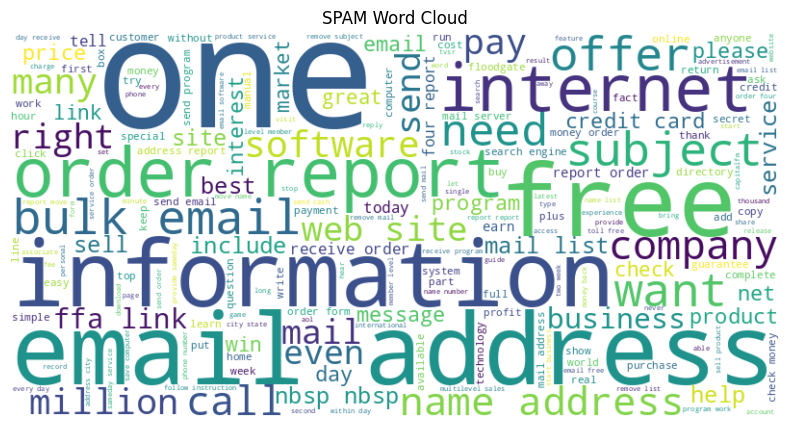

In [79]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("SPAM Word Cloud")
plt.show()

In [80]:
import collections

spam_lst = text.split(" ")
counter = collections.Counter(spam_lst)
print(counter.most_common(10))

total = len(spam_lst)
for item, count in counter.most_common(10):
    percentage = (count / total) * 100
    print(f"{item}: {percentage:.2f}%")

[('email', 1518), ('order', 1284), ('report', 1264), ('mail', 1044), ('address', 1037), ('send', 945), ('program', 933), ('free', 819), ('list', 799), ('receive', 796)]
email: 1.42%
order: 1.20%
report: 1.18%
mail: 0.97%
address: 0.97%
send: 0.88%
program: 0.87%
free: 0.76%
list: 0.75%
receive: 0.74%


In [81]:
text = ' '.join(ham_df['text'].astype(str).tolist())

text = re.sub(r'[^A-Za-z\s]', '', text)

text = text.lower()

stopwords = set(STOPWORDS)
text = ' '.join(word for word in text.split() if word not in stopwords and len(word) > 2)

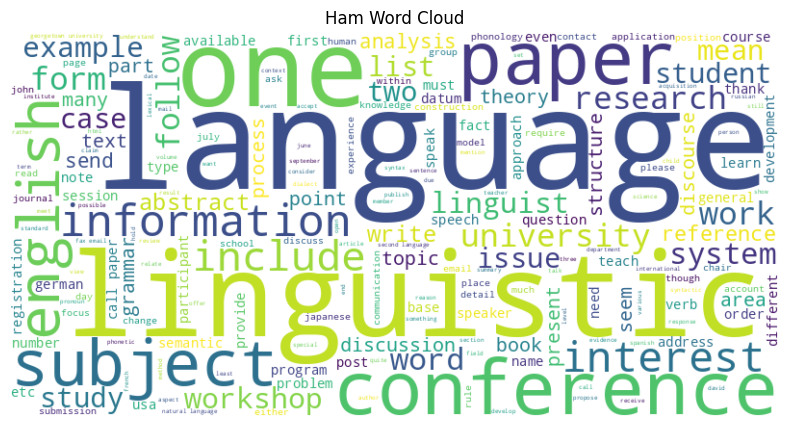

In [82]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Ham Word Cloud")
plt.show()

In [83]:
ham_lst = text.split(" ")
counter = collections.Counter(ham_lst)
print(counter.most_common(10))

total = len(ham_lst)
for item, count in counter.most_common(10):
    percentage = (count / total) * 100
    print(f"{item}: {percentage:.2f}%")

[('language', 1578), ('university', 1142), ('linguistic', 677), ('subject', 610), ('conference', 568), ('one', 457), ('edu', 456), ('information', 453), ('english', 422), ('email', 362)]
language: 1.35%
university: 0.98%
linguistic: 0.58%
subject: 0.52%
conference: 0.49%
one: 0.39%
edu: 0.39%
information: 0.39%
english: 0.36%
email: 0.31%


The most common words in the ham are clearly academic terms, which suggests this person is a professor.

In [58]:
spam_df['text_lengths'] = spam_df['text'].apply(
    lambda x: [len(part) for i, part in enumerate(x.split('\n')) if i not in (1, 3)]
)

print(spam_df.head())
lengths_df = pd.DataFrame(spam_df['text_lengths'].tolist())
print("Average length for subject:", lengths_df[0].median())
print("Average length for body text:", lengths_df[1].median())

             name                                               text  \
3    spmsga95.txt  Subject: service update\n\ndue significant rap...   
6    spmsgb16.txt  Subject: season greeting santa !\n\nsanta onli...   
9   spmsga161.txt  Subject: futuresignal\n\nmessage send complian...   
10  spmsgc135.txt  Subject: did work ? - calsvxtn\n\nhello thank ...   
13  spmsga130.txt  Subject: zero down internet opportunity !\n\n$...   

   text_lengths  
3     [23, 311]  
6     [32, 141]  
9    [21, 1765]  
10    [30, 133]  
13    [41, 152]  
Average length for subject: 31.0
Average length for body text: 1337.0


In [59]:
ham_df['text_lengths'] = ham_df['text'].apply(
    lambda x: [len(part) for i, part in enumerate(x.split('\n')) if i not in (1, 3)]
)

print(ham_df.head())
lengths_df = pd.DataFrame(ham_df['text_lengths'].tolist())
print("Average length for subject:", lengths_df[0].median())
print("Average length for body text:", lengths_df[1].median())

            name                                               text  \
0   6-14msg3.txt  Subject: wkshp : * early * - e ( = ) uralic in...   
1  6-110msg1.txt  Subject: job announcement - academium sinica\n...   
2   9-63msg1.txt  Subject: knowledge language bibliography\n\nas...   
4   6-97msg1.txt  Subject: job announcement\n\njob announcement ...   
5  8-887msg1.txt  Subject: hypermedium den geisteswissenschaften...   

  text_lengths  
0   [55, 1917]  
1   [44, 1339]  
2    [40, 953]  
4   [25, 1218]  
5   [46, 1136]  
Average length for subject: 35.0
Average length for body text: 1376.0


There are no super significant differences between subject and body text length between the spam and ham, besides the ham being a little more in subject and less in body. Even when looking at median (resistant to any outliers), the counts are very similar. 

## Conclusions

# 4.Prepare the Data


Apply any data transformations and explain what and why


Some things worth looking into:
- vectorizing words
- grouping words
- eliminating common words

# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


Models I'd like to try:
- svm
- naive bayes
- random forest
- rnn or cnn

# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 
